# IMPORTATION DES PACKTAGES UTILES

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

# IMPORTATION DES DONNÉES

In [2]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions.csv")

# ÉTUDE ET NETTOYAGE DES DATAFRAMES

## DATAFRAME CUSTOMERS

In [3]:
customers.shape

(8623, 3)

In [4]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_5412,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [7]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

## DATAFRAME PRODUCTS

In [8]:
products.shape

(3287, 3)

In [9]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [11]:
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_2104,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [12]:
# On supprime la ligne avec un prix < 0
products = products[products["price"] > 0]

In [13]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64


## DATAFRAME TRANSACTIONS

In [14]:
transactions.shape

(679532, 4)

In [15]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [16]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [17]:
transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [18]:
# On supprime les colonnes avec "test_"
transactions = transactions[~transactions.date.str.contains('|'.join(["test_"]))]
transactions.describe(include="all")

,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,679332,342315,8600
top,1_369,2021-07-14 09:33:28.974160,s_118668,c_1609
freq,2252,1,14,25488


In [19]:
transactions["date"] = pd.to_datetime(transactions["date"]).dt.date
transactions.describe(include="all")

,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,730,342315,8600
top,1_369,2022-11-30,s_118668,c_1609
freq,2252,1311,14,25488


In [20]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

# FUSION DES DATAFRAMES

In [21]:
# Fusion de products et transactions sur la colonne 'id_prod'
df1 = pd.merge(products, transactions, on="id_prod", how='right')
df1 = df1.dropna()

# Fusion de erp_liaison et web sur la colonne 'id_web'
df = pd.merge(df1, customers, on="client_id", how='left')
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1518,4.18,0.0,2022-05-20,s_211425,c_103,f,1986
1,0_1518,4.18,0.0,2021-09-26,s_95811,c_6197,m,1985
2,0_1518,4.18,0.0,2021-05-06,s_30782,c_682,f,1974
3,0_1518,4.18,0.0,2022-03-16,s_180057,c_5932,f,1962
4,0_1518,4.18,0.0,2022-11-12,s_296584,c_7217,f,1976


In [22]:
df.isnull().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
sex           0
birth         0
dtype: int64

# PARTIE 1 : 

# CHIFFRE D'AFFAIRES 

## DÉCOMPOSITION DE LA DATE 

In [23]:
df.insert(4, 'year', pd.to_datetime(df["date"]).dt.year)
df.insert(5, 'month', pd.to_datetime(df["date"]).dt.month)
df.insert(10, 'age', 2021 - df["birth"])

In [24]:
df["date"] = df["date"].astype('datetime64[ns]')
df = df.sort_values(by=['date']).set_index('date')
df.head()

,id_prod,price,categ,year,month,session_id,client_id,sex,birth,age
date,,,,,,,,,,
2021-03-01,0_1685,9.99,0.0,2021,3,s_199,c_3946,f,1956,65
2021-03-01,0_1536,6.59,0.0,2021,3,s_98,c_3590,m,1997,24
2021-03-01,1_160,18.21,1.0,2021,3,s_424,c_5253,f,1996,25
2021-03-01,0_1999,12.99,0.0,2021,3,s_34,c_2285,f,1977,44
2021-03-01,0_2056,5.13,0.0,2021,3,s_238,c_7670,f,1984,37


In [25]:
df.describe(include='all')

,id_prod,price,categ,year,month,session_id,client_id,sex,birth,age
count,679111,679111.000000,679111.000000,679111.000000,679111.000000,679111,679111,679111,679111.000000,679111.000000
unique,3265,NaN,NaN,NaN,NaN,342275,8600,2,NaN,NaN
top,1_369,NaN,NaN,NaN,NaN,s_118668,c_1609,m,NaN,NaN
freq,2252,NaN,NaN,NaN,NaN,14,25488,340826,NaN,NaN
mean,NaN,17.454773,0.441953,2021.670503,6.504383,NaN,NaN,NaN,1977.811149,43.188851
std,NaN,18.328998,0.595042,0.617562,3.480774,NaN,NaN,NaN,13.575361,13.575361
min,NaN,0.620000,0.000000,2021.000000,1.000000,NaN,NaN,NaN,1929.000000,17.000000
25%,NaN,8.870000,0.000000,2021.000000,3.000000,NaN,NaN,NaN,1970.000000,34.000000
50%,NaN,13.990000,0.000000,2022.000000,6.000000,NaN,NaN,NaN,1980.000000,41.000000
75%,NaN,18.990000,1.000000,2022.000000,9.000000,NaN,NaN,NaN,1987.000000,51.000000


## DÉTERMINATION DE LA PÉRIODE D'ÉTUDE

In [26]:
#df["date"] = df["date"].astype('datetime64[ns]')
df.dtypes
mindate = df.index.min().date()
maxdate = df.index.max().date()
duree = (maxdate-mindate).days

print('Date de début =', mindate, 'Date de fin =', maxdate)
print('Notre étude est réalisé sur une période de', 
     duree, 'jours. Soit', round(duree/365), 'ans')

Date de début = 2021-03-01 Date de fin = 2023-02-28
Notre étude est réalisé sur une période de 729 jours. Soit 2 ans


## ÉVOLUTION DU CHIFFRE D'AFFAIRES PAR MOIS

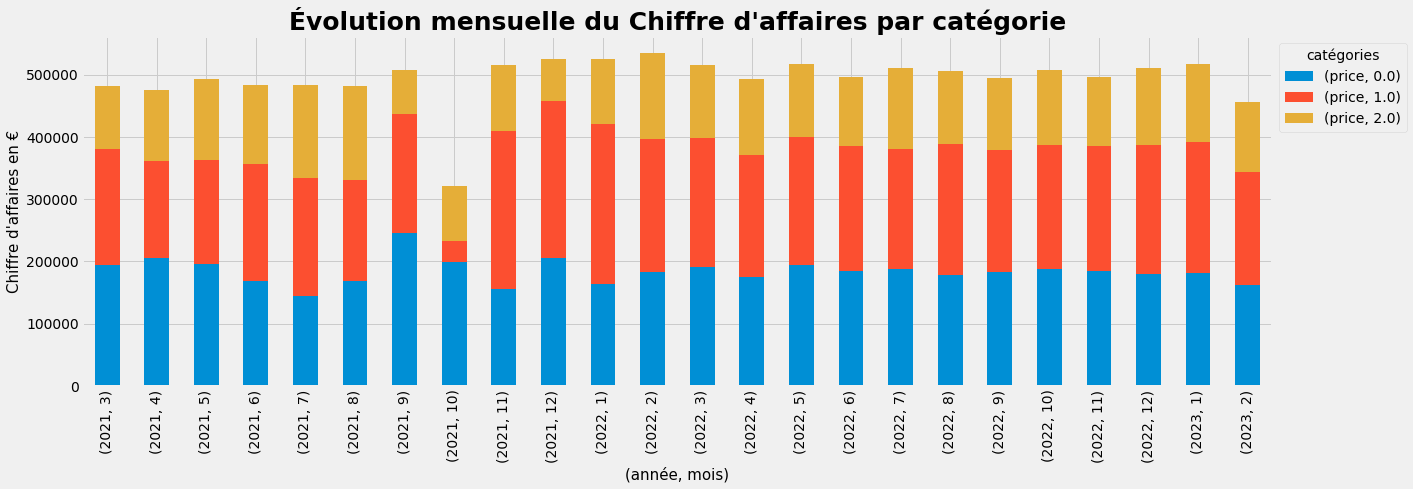

In [27]:
CA_monthly = df.groupby(['year', 'month', 'categ']).sum().astype('int')[["price"]]

ax = plt.style.use('fivethirtyeight')
ax = CA_monthly.unstack().plot(kind='bar', stacked=True, 
                               figsize=(19, 6))
ax = plt.xlabel('(année, mois)', fontsize=15)
ax = plt.ylabel('Chiffre d\'affaires en €', fontsize=15)
ax = plt.title('Évolution mensuelle du Chiffre d\'affaires par catégorie', fontsize=25, 
               fontweight='bold')

ax = plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, 
                title='catégories')

#for rec in ax.patches:
#    height = rec.get_height()
#    ax.text(rec.get_x() + rec.get_width() / 2, 
#              rec.get_y() + height / 2,
#              "{:.0f}%".format(height),
#              ha='center', 
#              va='bottom')
    
ax = plt.show()

## SÉRIE TEMPORELLE + MOYENNE MOBILE POUR CHIFFRE D'AFFAIRES

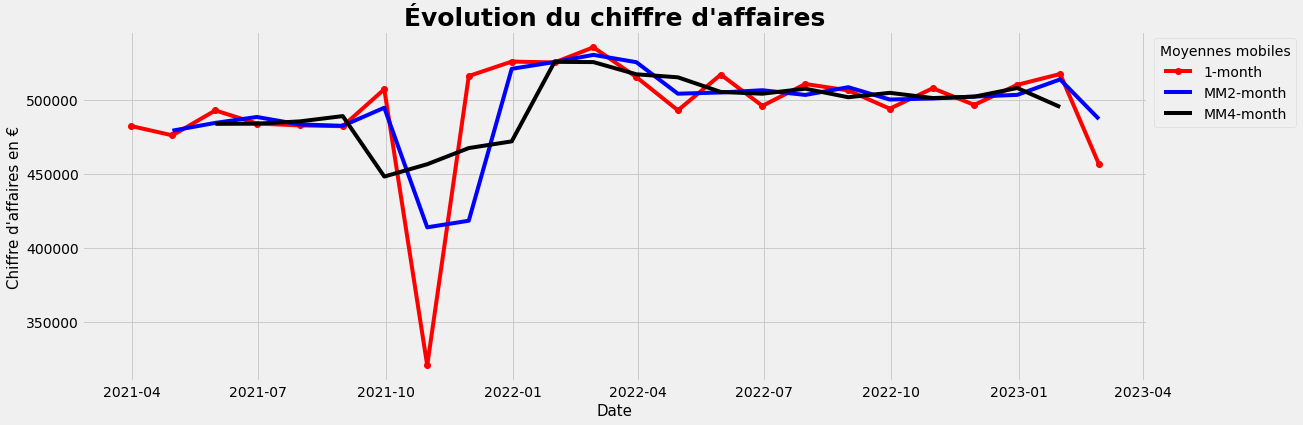

In [28]:
# Évolution mensuelle du CA
y = df['price'].resample('1M').sum()

# Calculs de qq moyennes moyennes mobiles
y_2M_rol = y.to_frame().rolling(window=2, center=True).mean()
y_3M_rol = y.to_frame().rolling(window=3, center=True).mean()
y_4M_rol = y.to_frame().rolling(window=4, center=True).mean()

ax = plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(17, 6))
ax=plt.plot(y, 'r', marker='o', markersize=6, label='1-month')
ax=plt.plot(y_2M_rol, 'b', label='MM2-month')
#ax=plt.plot(y_3M_rol, 'g', label='MM3-month')
ax=plt.plot(y_4M_rol, 'k', label='MM4-month')
ax=plt.title('Évolution du chiffre d\'affaires', fontsize=25, fontweight='bold')
ax=plt.xlabel('Date', fontsize=15)
ax=plt.ylabel('Chiffre d\'affaires en €', fontsize=15)

ax=plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, 
                title='Moyennes mobiles')

plt.show()

## CHUTE DU CHIFFRE D'AFFAIRES OCTOBRE 2021 POUR LA CATEG 1

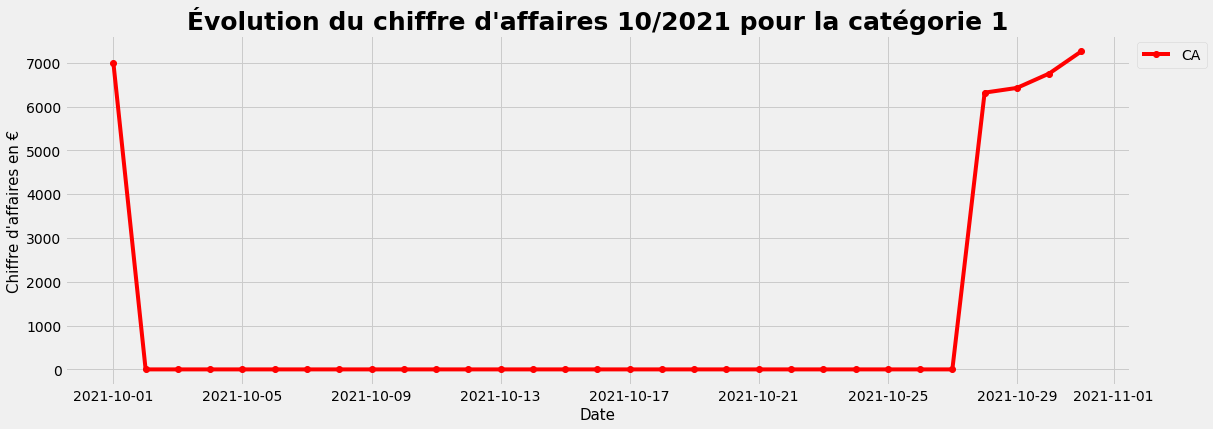

In [29]:
oct_2021_categ1 = df[df['categ'] == 1]
y = oct_2021_categ1.loc['2021-10'][['price']].resample('d').sum()

ax = plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(17, 6))
ax = plt.plot(y, 'r', marker='o', markersize=6, label='CA')
ax = plt.title('Évolution du chiffre d\'affaires 10/2021 pour la catégorie 1', 
               fontsize=25, fontweight='bold')
ax = plt.xlabel('Date', fontsize=15)
ax = plt.ylabel('Chiffre d\'affaires en €', fontsize=15)
ax = plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Annotation des dates de début et fin du CA = 0
start0 = y.index[1].strftime('%Y-%m-%d')
end0 = y.index[-5].strftime('%Y-%m-%d')

plt.show()

# RÉPARTITION DU CHIFFRE D'AFFAIRES PAR CATÉGORIES

In [30]:
Nb_Ventes_categ = df['categ'].value_counts().tolist()
#Nb_Ventes_categ

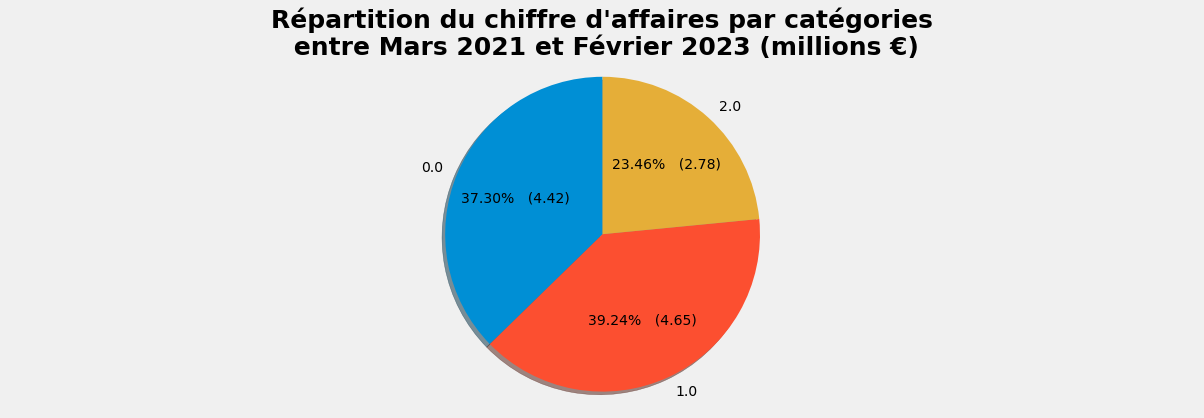

In [31]:
CA_categ = df.groupby(['categ']).sum()["price"].tolist()
CA_categ = [round((i / 1000000), 2) for i in CA_categ]

labels = df.groupby(['categ']).sum()[["price"]].index.tolist()
CA_categ

fig1, ax1 = plt.subplots(figsize=(19, 6))
ax1.pie(CA_categ, labels=labels, 
        autopct=lambda p:f'{p:.2f}%   ({p*sum(CA_categ)/100 :.2f})',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Répartition du chiffre d\'affaires par catégories'
             '\n entre Mars 2021 et Février 2023 (millions €)',
             fontsize=25, fontweight='bold')

plt.show()

## RÉPARTITION DES PRIX PAR CATÉGORIE 

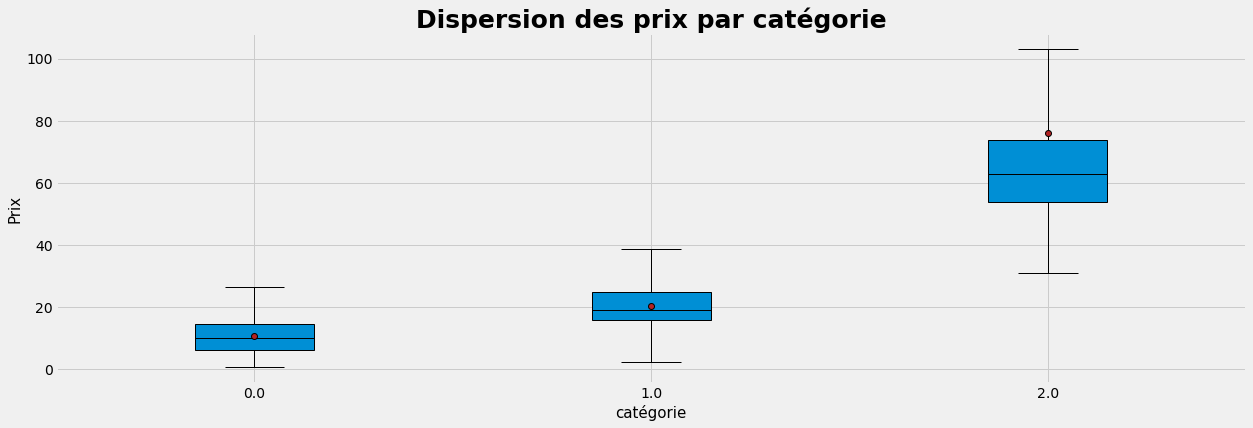

In [32]:
X = 'categ' # qualitative
Y = 'price' # quantitative

modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X] == m][Y])
    
# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.figure(figsize=(19, 6))    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Dispersion des prix par catégorie', fontsize=25, fontweight='bold')
plt.xlabel('catégorie', fontsize=15)
plt.ylabel('Prix', fontsize=15)

plt.show()

## CALCUL DU RAPPORT DE CORRÉLATION

In [33]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [34]:
eta_squared(df['categ'], df['price'])

0.6457472738640962

# TOP ET FLOP DES VENTES DE PRODUITS

In [35]:
#cat = df.set_index('id_prod')
cat = df.groupby(['id_prod']).sum()
cat.reset_index(inplace=True)
cat = cat.rename(columns={'price': 'Total des ventes €'})
cat = cat[['id_prod', 'Total des ventes €']]

cat_counts = df['id_prod'].value_counts().to_frame()
cat_counts.reset_index(inplace=True)
cat_counts = cat_counts.rename(columns={'index': 'id_prod',
                                    'id_prod': 'Nombre de ventes'})

cat_df=pd.merge(cat, cat_counts, on='id_prod', how='left') 
cat_df['price'] = cat_df['Total des ventes €']/cat_df['Nombre de ventes']
#cat_df.sort_values(by=['Total des ventes €'])

In [36]:
# TOP 20 des produits les plus vendus
cat_df_top = cat_df.sort_values(by='Nombre de ventes', ascending=False).head(20)
cat_df_top

,id_prod,Total des ventes €,Nombre de ventes,price
2591,1_369,54025.48,2252,23.99
2644,1_417,45947.11,2189,20.99
2641,1_414,51949.40,2180,23.83
2733,1_498,49731.36,2128,23.37
2653,1_425,35611.04,2096,16.99
2629,1_403,35260.40,1960,17.99
2639,1_412,32484.15,1951,16.65
2640,1_413,34990.55,1945,17.99
2632,1_406,48106.59,1939,24.81
2633,1_407,30940.65,1935,15.99


In [37]:
# TOP 20 des produits les moins vendus
cat_df_flop = cat_df.sort_values(by='Nombre de ventes').head(20)
cat_df_flop

,id_prod,Total des ventes €,Nombre de ventes,price
1327,0_2201,20.99,1,20.99
665,0_1601,1.99,1,1.99
1792,0_549,2.99,1,2.99
3247,2_81,86.99,1,86.99
2079,0_807,1.99,1,1.99
752,0_1683,2.99,1,2.99
166,0_1151,2.99,1,2.99
698,0_1633,24.99,1,24.99
2108,0_833,2.99,1,2.99
2166,0_886,21.82,1,21.82


# ÉTUDE DES CLIENTS PAR SEXE ET AGE

## AJOUT DE LA COLONNE TRANCHE D'AGE

In [38]:
cut_labels = ['moins de 18 ans', '18-29 ans', '30-39 ans', '40-49 ans',
             '50-59 ans', '60-69 ans', '70-79 ans', '80 ans ou plus']
cut_bins = [0, 17, 29, 39, 49, 59, 69, 79, 120]
df['tranche_age'] = pd.cut(df['age'], bins=cut_bins, labels=cut_labels)

In [39]:
df.head()

,id_prod,price,categ,year,month,session_id,client_id,sex,birth,age,tranche_age
date,,,,,,,,,,,
2021-03-01,0_1685,9.99,0.0,2021,3,s_199,c_3946,f,1956,65,60-69 ans
2021-03-01,0_1536,6.59,0.0,2021,3,s_98,c_3590,m,1997,24,18-29 ans
2021-03-01,1_160,18.21,1.0,2021,3,s_424,c_5253,f,1996,25,18-29 ans
2021-03-01,0_1999,12.99,0.0,2021,3,s_34,c_2285,f,1977,44,40-49 ans
2021-03-01,0_2056,5.13,0.0,2021,3,s_238,c_7670,f,1984,37,30-39 ans


## RÉPARTITION DES CLIENTS PAR SEX ET TRANCHE D'AGE

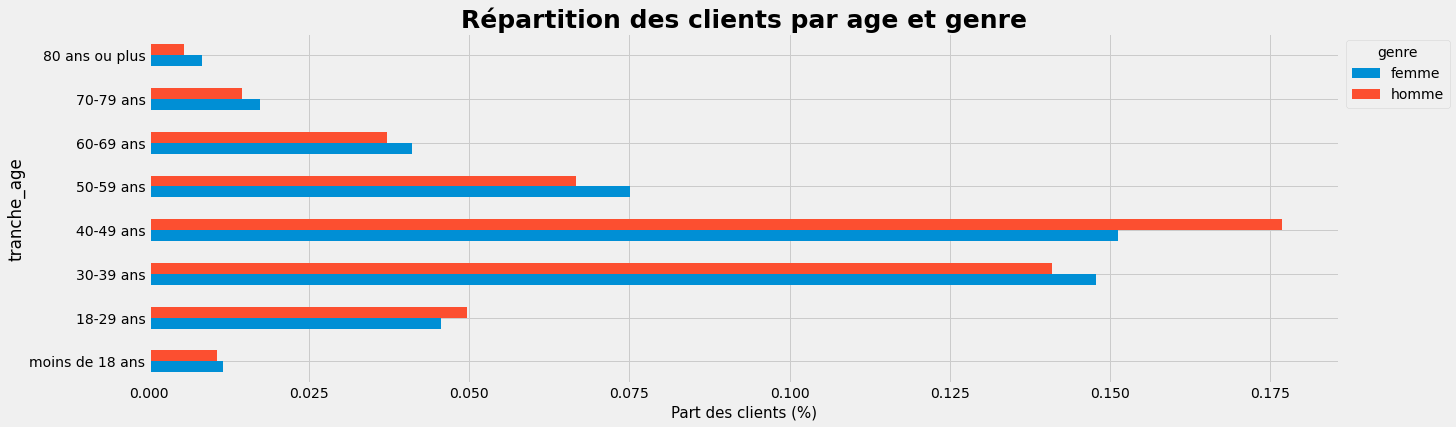

In [40]:
# Clients par tranche d'age et sex
# On regroupe les clients par age et sex puis on les compte
clients = df.groupby(['tranche_age', 'sex']).count()[['age']]

# Valeurs normalisées (pourcentage)
clients = clients/clients.sum()

# On crée notre dataframe
clients = clients.reset_index(level='sex')
femme = clients[clients['sex'] == 'f']['age']
homme = clients[clients['sex'] == 'm']['age']
femme.name = 'femme'
homme.name = 'homme'
clients = pd.concat([femme, homme], axis=1)

ax = plt.style.use('fivethirtyeight')
ax = clients.plot.barh(figsize=(19, 6))
ax = plt.xlabel('Part des clients (%)', fontsize=15)
ax = plt.title('Répartition des clients par age et genre', fontsize=25, 
               fontweight='bold')

ax = plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, 
                title='genre')

## ÉTUDE DE LA RÉPARTITION DU CHIFFRE D'AFFAIRES PAR CLIENTS

In [41]:
CA_clients = df.groupby('client_id').agg({'price': 'sum', 
                                          'sex': 'max', 
                                          'tranche_age': 'max'})

CA_clients = CA_clients.reset_index()
CA_clients = CA_clients.rename(columns={'price': 'Total_ventes'})
Nb_Vente_clients = df['client_id'].value_counts().to_frame()
Nb_Vente_clients = Nb_Vente_clients.reset_index()
Nb_Vente_clients = Nb_Vente_clients.rename(columns={'index': 'client_id',
                                                    'client_id': 'Nombre de Ventes'})

# Fusion des dataframmes
CA_clients_tot = pd.merge(CA_clients, Nb_Vente_clients, on='client_id')
CA_clients_tot = CA_clients_tot.set_index('client_id')

## COURBE DE LORENZ POUR LE CHIFFRE D'AFFAIRES

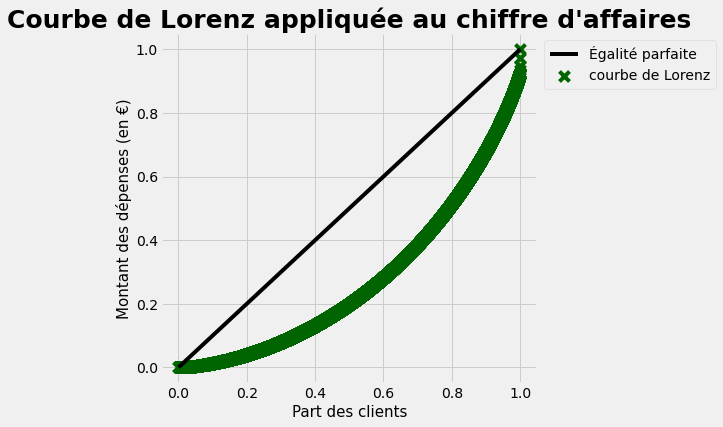

In [42]:
X = CA_clients_tot.sort_values('Total_ventes')['Total_ventes']

X_lorenz = (X.cumsum() / X.sum()).array
X_lorenz = np.insert(X_lorenz, 0, 0)

#X_lorenz

# x abscisse
x=np.arange(X_lorenz.size)
# axe x normalisé
x=x/(X_lorenz.size-1)

fig, ax = plt.subplots(figsize=(6, 6))
## scatter plot of Lorenz curve
ax.scatter(x, X_lorenz, 
           marker='x', color='darkgreen', s=100, label='courbe de Lorenz')
## ligne d'égalité parfaite (tt le monde dépense la même qt)
ax.plot([0,1], [0,1], color='k', label='Égalité parfaite')
ax.set_title('Courbe de Lorenz appliquée au chiffre d\'affaires', 
             fontsize=25, fontweight='bold')
ax.set_xlabel('Part des clients', fontsize=15)
ax.set_ylabel('Montant des dépenses (en €)', fontsize=15)

ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

## TRI DES CLIENTS SELON LEURS DÉPENSES TOTALES

## TOP 10 DES CLIENTS LES MOINS DÉPENSIERS

In [43]:
CA_clients_tot.sort_values('Total_ventes').head(10)

,Total_ventes,sex,tranche_age,Nombre de Ventes
client_id,,,,
c_8351,6.31,f,50-59 ans,1
c_8140,8.30,m,50-59 ans,2
c_8114,9.98,m,50-59 ans,2
c_240,11.06,m,18-29 ans,1
c_4648,11.20,m,moins de 18 ans,1
c_4478,13.36,f,50-59 ans,1
c_5962,13.99,f,18-29 ans,1
c_6040,15.72,f,40-49 ans,2
c_5919,15.98,f,60-69 ans,2


## TOP 10 DES CLIENTS LES PLUS DÉPENSIERS

In [44]:
# TOP 10 des clients les plus dépensiers 
CA_clients_tot.sort_values('Total_ventes', ascending=False).head(10)

,Total_ventes,sex,tranche_age,Nombre de Ventes
client_id,,,,
c_1609,324033.35,m,40-49 ans,25488
c_4958,289760.34,m,18-29 ans,5195
c_6714,153598.92,f,50-59 ans,9181
c_3454,113637.93,m,50-59 ans,6770
c_3263,5276.87,f,30-39 ans,403
c_1570,5271.62,f,40-49 ans,369
c_2899,5214.05,f,18-29 ans,105
c_2140,5208.82,f,40-49 ans,402
c_7319,5155.77,f,40-49 ans,371


# PARTIE 2 - DEMANDES DE JULIE

## LIEN ENTRE LE GENRE D'UN CLIENT ET LA CATÉGORIE DES LIVRES ACHETÉS (QUALI - QUALI)

In [45]:
genre_client = df[['sex', 'categ']]
cont = genre_client.pivot_table(index='sex', 
                                columns='categ', 
                                aggfunc=len,
                                margins=True, 
                                margins_name='Total')
cont # Tableau de contingence

categ,0.0,1.0,2.0,Total
sex,,,,
f,206103,114899,17283,338285
m,209356,112270,19200,340826
Total,415459,227169,36483,679111


## MÉTHODE CHI2

In [46]:
# Hyphothèse nulle = variables indépendantes
# st_chi2 = statistique khi2
# st_p = p_value
# st_dof = nombre de degrés de liberté
# st_exp = tableau d'indépendance
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
print('p_value =', st_p)
print('Nos 2 variables ne sont pas indépendantes')

p_value = 3.144522803251581e-29
Nos 2 variables ne sont pas indépendantes


## TEST DE LA NATURE NORMALE DES DISTRIBUTIONS

## ANALYSE DE LA VARIABLE PRIX

## CALCUL DES STATS DE BASE

In [47]:
print('min =', df['price'].min(), 'max =', df['price'].max(),
     'mean =', round(df['price'].mean(), 2), 'median =', df['price'].median(),
     'mode =', df['price'].mode()[0],
     'standard deviation =', round(df['price'].std(ddof=0), 2))

min = 0.62 max = 300.0 mean = 17.45 median = 13.99 mode = 15.99 standard deviation = 18.33


## MÉTHODE 1 : GRAPHIQUE

## HISTOGRAMME

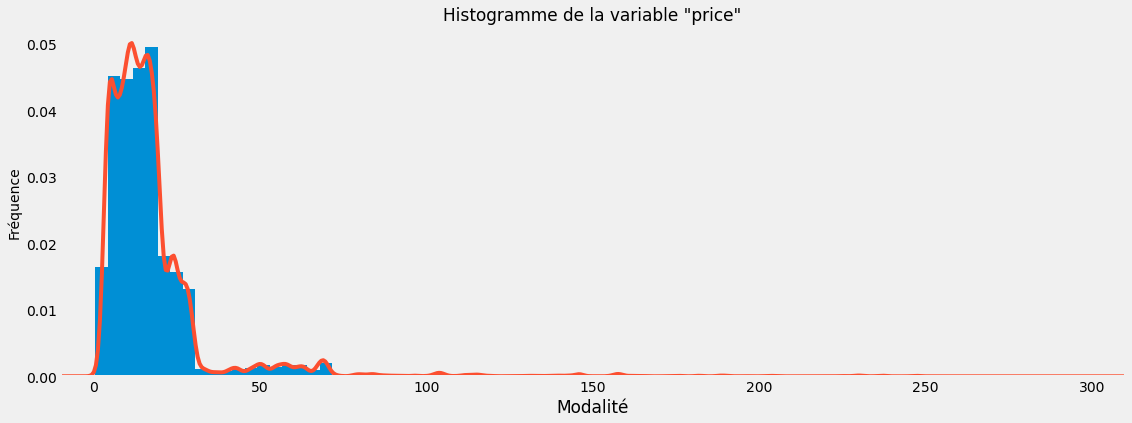

In [48]:
fig, ax = plt.subplots(figsize = (17, 6))

# Tracé de l'histogramme
df['price'].hist(density=True, bins=80)
df['price'].plot(kind = "kde")
ax.set_xlabel('Modalité', size=17); ax.set_xlim(-10, 310)
ax.set_ylabel('Fréquence', size=14)
ax.set_title('Histogramme de la variable "price"', size=17)
plt.grid(False)

plt.show()

## BOXPLOT

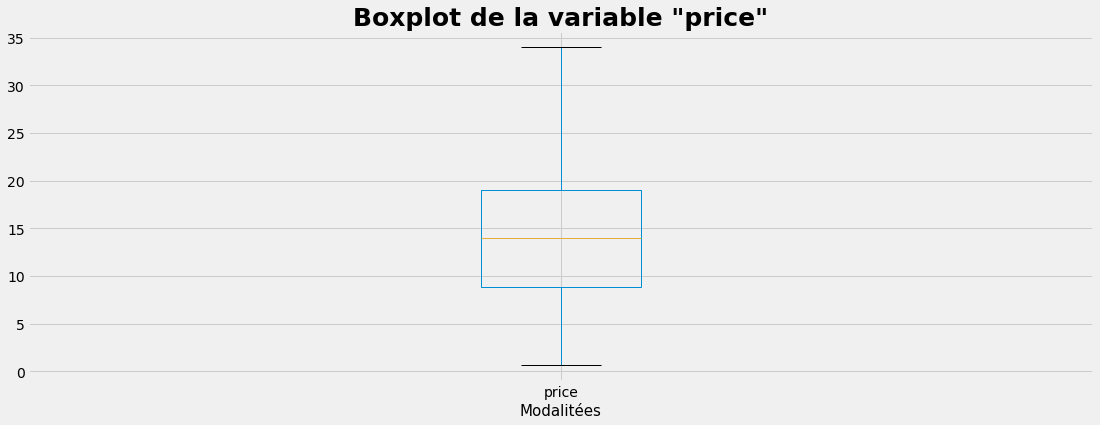

In [49]:
# Tracé de la boxplot
plt.figure(figsize=(17, 6))
df.boxplot(column="price", showfliers=False)
plt.title('Boxplot de la variable "price"', fontsize=25, fontweight='bold')
plt.xlabel('Modalitées', size=15)
plt.show()

## COEFFICIENT D'ASYMÉTRIE ET D'APPLATISSEMENT

In [50]:
print('Coefficient d\'asymétrie =', st.skew(df['price']))
print('Coefficient d\'aplatissement =', st.kurtosis(df['price']))

Coefficient d'asymétrie = 5.3903469210976285
Coefficient d'aplatissement = 43.068398893360964


## MÉTHODE 2 : QQ PLOT

/home/hao/.local/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 1224x432 with 0 Axes>

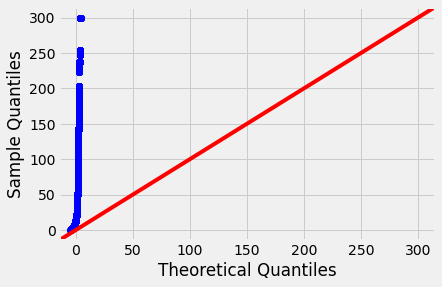

In [51]:
plt.figure(figsize=(17, 6))
sm.qqplot(df['price'], line='45')
plt.show()

## LIEN ENTRE L'ÂGE DES CLIENTS ET LE MONTANT TOTAL DES ACHATS (QUANTI - QUANTI)

In [52]:
age_CA_tot = df.groupby('age').agg({'age': 'count',
                                    'price': 'sum',
                                    'tranche_age': 'max'})

age_CA_tot = age_CA_tot.rename(columns={'price': 'Total_achats',
                                        'age': 'Nombre de clients'})
age_CA_tot['Total_achats_par_clients'] = age_CA_tot['Total_achats'] / age_CA_tot['Nombre de clients'] 
age_CA_tot = age_CA_tot.reset_index()
age_CA_tot = age_CA_tot[['age', 'Total_achats', 'Nombre de clients',
                         'Total_achats_par_clients', 'tranche_age']]

age_CA_tot.sort_values('Total_achats', ascending=False)

,age,Total_achats,Nombre de clients,Total_achats_par_clients,tranche_age
24,41,613614.58,47409,12.942998,40-49 ans
0,17,609013.69,15149,40.201577,moins de 18 ans
5,22,489497.54,10241,47.797826,18-29 ans
25,42,334267.72,24878,13.436278,40-49 ans
16,33,330760.73,25000,13.230429,30-39 ans
...,...,...,...,...,...
72,89,5043.19,311,16.216045,80 ans ou plus
69,86,4793.55,271,17.688376,80 ans ou plus
74,91,4013.87,226,17.760487,80 ans ou plus
75,92,3221.85,201,16.029104,80 ans ou plus


## MÉTHODE 1 : DIAGRAMME DE DISPERSION + RÉGRESSION LINÉAIRE

(-4633.608512371373, 408501.7781347536, 1.194953584338547e-16)

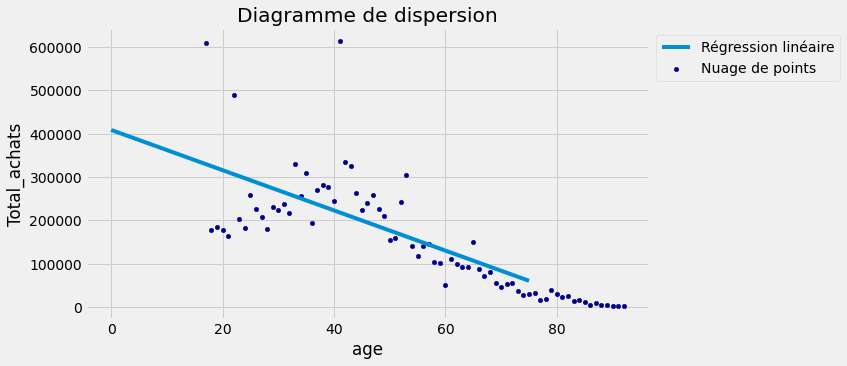

In [53]:
# Calcul des valeurs utiles à la régression linéaire

# https://mrmint.fr/regression-lineaire-python-pratique (détails)
slope, intercept, r_value, p_value, std_err = st.linregress(age_CA_tot['age'], 
              age_CA_tot['Total_achats'])

# Méthode openclassroom : https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4774671-analysez-deux-variables-quantitatives-par-regression-lineaire
#import statsmodels.api as sm
#Y = age_CA_tot['Total_achats €']
#X = age_CA_tot[['age']]
#X = X.copy()
#X['intercept']=1.
#result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
#a,b = result.params['age'],result.params['intercept']

# Tracé de la régression linéaire
ax = age_CA_tot.plot.scatter(x='age', 
                             y='Total_achats',
                             title='Diagramme de dispersion',
                             c='DarkBlue',
                             figsize=(9, 5),
                             label='Nuage de points')

ax = plt.plot(np.arange(len(age_CA_tot)),
          [slope*x+intercept for x in np.arange(len(age_CA_tot))],
          label='Régression linéaire')

ax = plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

slope, intercept, p_value

In [54]:
#age_CA_tot.groupby('age').sum()[['Total_achats €']].sort_values(by='Total_achats €', ascending=False)

## COEFFICIENT DE CORRÉLATION DE PEARSON

In [54]:
print('Coefficient corrélation =', st.pearsonr(age_CA_tot['age'],
      age_CA_tot['Total_achats'])[0])
print('p_value =', st.pearsonr(age_CA_tot['age'],
      age_CA_tot['Total_achats'])[1])
print('p_value < 0,05 les 2 variables ne sont pas indépendantes')

Coefficient corrélation = -0.7788810457117026
p_value = 1.1949535843385333e-16
p_value < 0,05 les 2 variables ne sont pas indépendantes


## MÉTHODE 2 : BOXPLOT (QUALI- QUANTI)

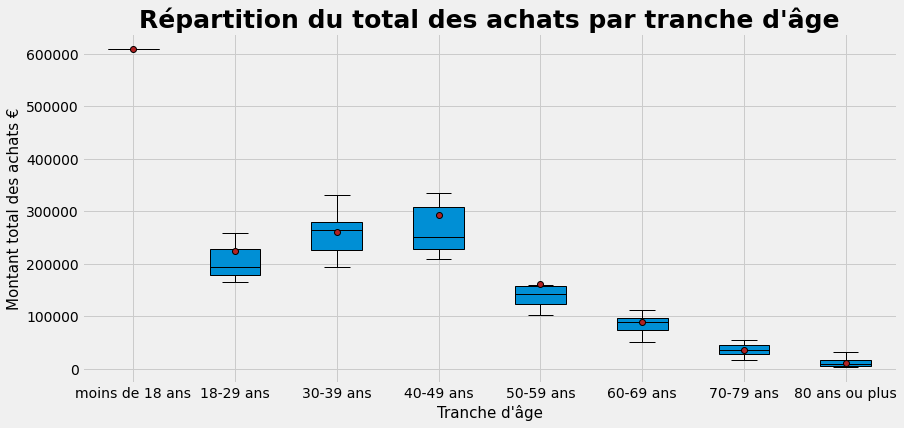

In [55]:
X = 'tranche_age' # qualitative
Y = 'Total_achats' # quantitative

modalites = age_CA_tot[X].unique()
groupes = []
for m in modalites:
    groupes.append(age_CA_tot[age_CA_tot[X] == m][Y])
    
# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.figure(figsize=(13, 6))    
plt.boxplot(groupes, labels=modalites, showfliers=False, 
            medianprops=medianprops, patch_artist=True, 
            showmeans=True, meanprops=meanprops)

plt.title('Répartition du total des achats par tranche d\'âge', 
          fontsize=25, 
          fontweight='bold')

plt.xlabel('Tranche d\'âge', fontsize=15)
plt.ylabel('Montant total des achats €', fontsize=15)
plt.show()

## CALCUL DU RAPPORT DE CORRÉLATION

In [56]:
print('Coefficient de corrélation =',
      eta_squared(age_CA_tot['tranche_age'], 
      age_CA_tot['Total_achats']))

Coefficient de corrélation = 0.7853636880890591


## CALCUL DE LA P VALUE

In [57]:
data = age_CA_tot[['tranche_age', 'Total_achats']]
result = ols('Total_achats ~ tranche_age', data=data).fit()
table = sm.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
tranche_age,7.0,1.016603e+12,1.452291e+11,35.544998,2.429434e-20
Residual,68.0,2.778331e+11,4.085780e+09,NaN,NaN


In [59]:
#age_CA_tot[age_CA_tot['tranche_age'] == '70-79 ans']

## LIEN ENTRE L'ÂGE DES CLIENTS ET LE MONTANT DU PANIER MOYEN (QUANTI-QUANTI)

In [58]:
age_panier_moyen = df.groupby('age').agg({'price': 'mean', 
                                    'tranche_age': 'max'})
age_panier_moyen = age_panier_moyen.rename(columns={'price': 'Panier moyen €'})
age_panier_moyen = age_panier_moyen.reset_index()
age_panier_moyen

,age,Panier moyen €,tranche_age
0,17,40.201577,moins de 18 ans
1,18,40.767737,18-29 ans
2,19,40.178305,18-29 ans
3,20,41.979704,18-29 ans
4,21,37.391339,18-29 ans
...,...,...,...
71,88,16.117638,80 ans ou plus
72,89,16.216045,80 ans ou plus
73,90,16.561471,80 ans ou plus
74,91,17.760487,80 ans ou plus


## MÉTHODE 1 : DIAGRAMME DE DISPERSION

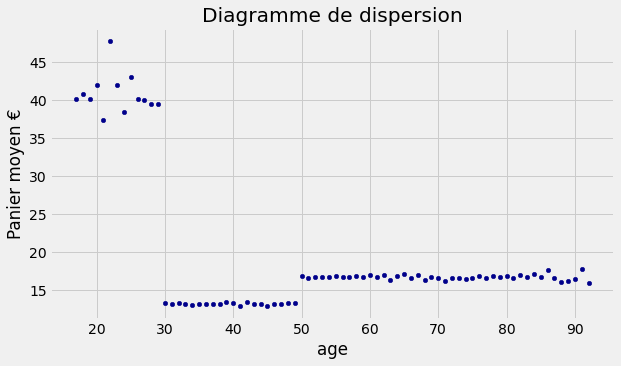

In [61]:
ax = age_panier_moyen.plot.scatter(x='age', 
                             y='Panier moyen €',
                             title='Diagramme de dispersion',
                             c='DarkBlue',
                             figsize=(9, 5))

In [59]:
print('Coefficient corrélation =', st.pearsonr(age_panier_moyen['age'],
      age_panier_moyen['Panier moyen €'])[0])
print('p_value =', st.pearsonr(age_panier_moyen['age'],
      age_panier_moyen['Panier moyen €'])[1])
print('p_value < 0,05 les 2 variables ne sont pas indépendantes')

Coefficient corrélation = -0.5478614363790846
p_value = 3.0190378158595884e-07
p_value < 0,05 les 2 variables ne sont pas indépendantes


## AJOUT DE LA COLONNE TRANCHE DES PANIERS MOYENS

In [60]:
age_panier_moyen
cut_labels = ['moins de 15 €', 'Entre 15 et 20 €', 'plus de 20 €']
cut_bins = [0, 15, 20, 120]
age_panier_moyen['tranche_panier_moyen'] = pd.cut(age_panier_moyen['Panier moyen €'], 
                           bins=cut_bins, 
                           labels=cut_labels)
age_panier_moyen

,age,Panier moyen €,tranche_age,tranche_panier_moyen
0,17,40.201577,moins de 18 ans,plus de 20 €
1,18,40.767737,18-29 ans,plus de 20 €
2,19,40.178305,18-29 ans,plus de 20 €
3,20,41.979704,18-29 ans,plus de 20 €
4,21,37.391339,18-29 ans,plus de 20 €
...,...,...,...,...
71,88,16.117638,80 ans ou plus,Entre 15 et 20 €
72,89,16.216045,80 ans ou plus,Entre 15 et 20 €
73,90,16.561471,80 ans ou plus,Entre 15 et 20 €
74,91,17.760487,80 ans ou plus,Entre 15 et 20 €


## MÉTHODE 2 : BOXPLOT (QUANTI-QUALI)

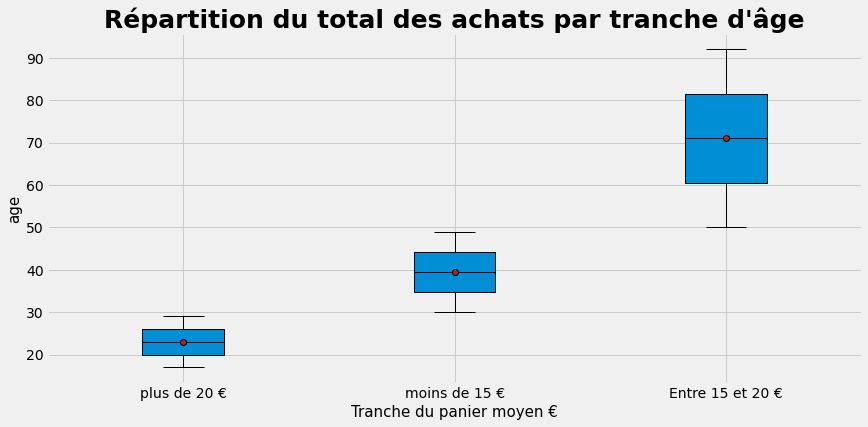

In [61]:
X = 'tranche_panier_moyen' # qualitative
Y = 'age' # quantitative

modalites = age_panier_moyen[X].unique()
groupes = []
for m in modalites:
    groupes.append(age_panier_moyen[age_panier_moyen[X] == m][Y])
    
# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.figure(figsize=(13, 6))    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Répartition du total des achats par tranche d\'âge', fontsize=25, 
               fontweight='bold')

plt.xlabel('Tranche du panier moyen €', fontsize=15)
plt.ylabel('age', fontsize=15)
plt.show()

## CALCUL DU RAPPORT DE CORRÉLATION

In [62]:
print('Coefficient de corrélation =',
      eta_squared(age_panier_moyen['tranche_panier_moyen'],
      age_panier_moyen['age']))

Coefficient de corrélation = 0.7957894736842105


## CALCUL DE LA P VALUE

In [63]:
data = age_panier_moyen[['age', 'tranche_panier_moyen']]
result = ols('age ~ tranche_panier_moyen', data=data).fit()
table = sm.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
tranche_panier_moyen,2.0,29106.0,14553.000000,142.237113,6.574331e-26
Residual,73.0,7469.0,102.315068,NaN,NaN


## LIEN ENTRE L'AGE DES CLIENTS ET LA CATÉGORIE DE LIVRES ACHETÉS (QUANTI - QUALI)

In [64]:
age_categ = df[['age', 'categ']]

In [65]:
age_categ.pivot_table(index='age', columns='categ', aggfunc=len,
                        margins=True, margins_name='Total')

categ,0.0,1.0,2.0,Total
age,,,,
17,3418,5719,6012,15149
18,909,1678,1784,4371
19,1016,1723,1845,4584
20,974,1550,1728,4252
21,1114,1628,1671,4413
...,...,...,...,...
89,132,177,2,311
90,77,91,2,170
91,75,149,2,226


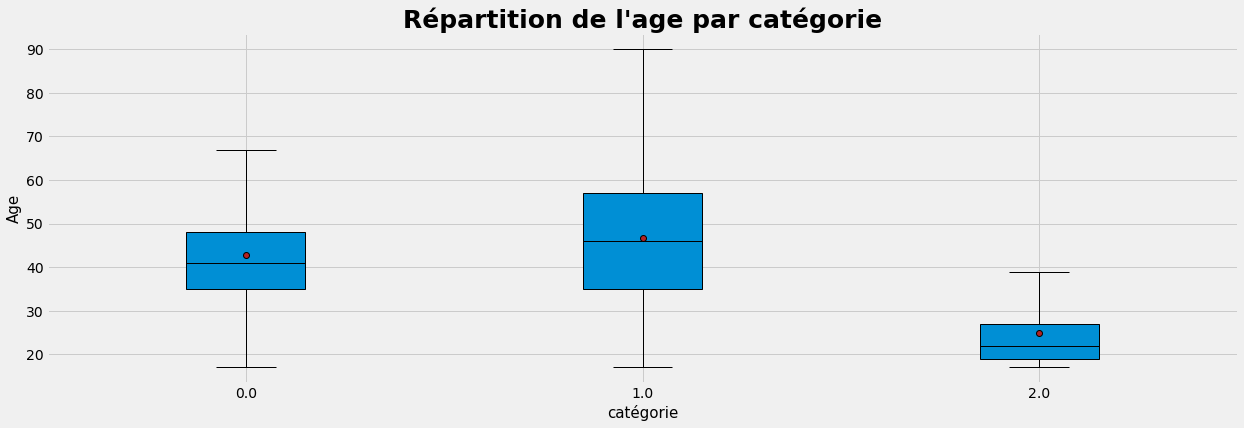

In [66]:
X = 'categ' # qualitative
Y = 'age' # quantitative

modalites = age_categ[X].unique()
groupes = []
for m in modalites:
    groupes.append(age_categ[age_categ[X] == m][Y])
    
# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.figure(figsize=(19, 6))    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Répartition de l\'age par catégorie', fontsize=25, fontweight='bold')
plt.xlabel('catégorie', fontsize=15)
plt.ylabel('Age', fontsize=15)

plt.show()

## CALCUL DU RAPPORT DE CORRÉLATION

In [67]:
eta_squared(age_categ['categ'], age_categ['age'])

0.11903391947235274

## CALCUL DE LA P VALUE

In [68]:
data = age_categ[['categ', 'age']]
result = ols('age ~ categ', data=data).fit()
table = sm.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
categ,1.0,1.232600e+06,1.232600e+06,6754.872084,0.0
Residual,679109.0,1.239209e+08,1.824757e+02,NaN,NaN


## LIEN ENTRE L'AGE ET LA FRÉQUENCE D'ACHAT QUANTI - QUANTI

In [69]:
age_freq = df.groupby('age').size().reset_index(name='counts')
age_freq = age_freq.assign(AchatsParMois=lambda x: x.counts / 24)
age_freq = age_freq.assign(AchatsParSemaine=lambda x: x.counts / 104)

age_freq.head()

,age,counts,AchatsParMois,AchatsParSemaine
0,17,15149,631.208333,145.663462
1,18,4371,182.125000,42.028846
2,19,4584,191.000000,44.076923
3,20,4252,177.166667,40.884615
4,21,4413,183.875000,42.432692


## DIAGRAMME DE DISPERSION + RÉGRESSION LINÉAIRE

(-8.750883458646614, 849.2427756892229)

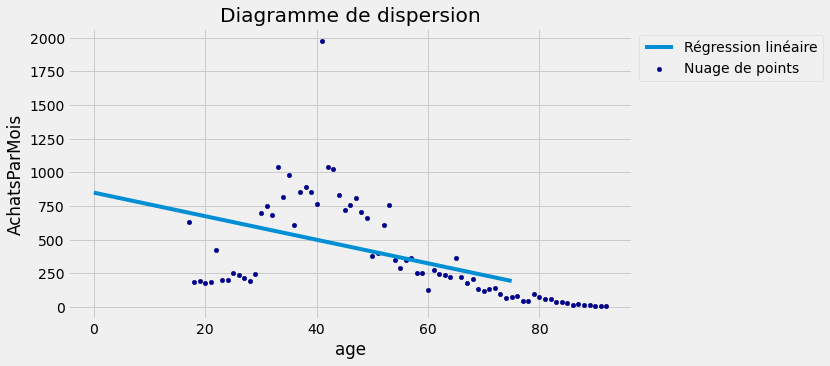

In [70]:
# Calcul des valeurs utiles à la régression linéaire

# https://mrmint.fr/regression-lineaire-python-pratique (détails)
slope, intercept, r_value, p_value, std_err = st.linregress(age_freq['age'], 
              age_freq['AchatsParMois'])

# Tracé de la régression linéaire
ax = age_freq.plot.scatter(x='age', 
                             y='AchatsParMois',
                             title='Diagramme de dispersion',
                             c='DarkBlue',
                             figsize=(9, 5),
                             label='Nuage de points')

ax = plt.plot(np.arange(len(age_freq)),
          [slope*x+intercept for x in np.arange(len(age_freq))],
          label='Régression linéaire')

ax = plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

slope, intercept

## COEFFICIENT DE CORRÉLATION DE PEARSON

In [71]:
print(st.pearsonr(age_freq['age'],
      age_freq['AchatsParMois'])[0])

print('Coefficient corrélation =', st.pearsonr(age_freq['age'],
      age_freq['AchatsParMois'])[0])
print('p_value =', st.pearsonr(age_freq['age'],
      age_freq['AchatsParMois'])[1])
print('p_value < 0,05 les 2 variables ne sont pas indépendantes')

-0.5337344271238333
Coefficient corrélation = -0.5337344271238333
p_value = 6.876677470343458e-07
p_value < 0,05 les 2 variables ne sont pas indépendantes


# CALCUL DE PROBABILITÉ

In [72]:
# Nombre de personnes ayant achetées 2_159
df=df[['id_prod', 'client_id']]
df

,id_prod,client_id
date,,
2021-03-01,0_1685,c_3946
2021-03-01,0_1536,c_3590
2021-03-01,1_160,c_5253
2021-03-01,0_1999,c_2285
2021-03-01,0_2056,c_7670
...,...,...
2023-02-28,1_283,c_7495
2023-02-28,0_1705,c_4561
2023-02-28,1_283,c_6775


In [75]:
# Nombre de personnes ayant achetées 2_159
achat_1 = df[df['id_prod'] == '2_159']
achat_1 = achat_1.drop_duplicates("client_id", keep='last')
achat_1

# Nombre de personnes ayant achetées 0_525
achat_2 = df[df['id_prod'] == '0_525']
achat_2 = achat_2.drop_duplicates("client_id", keep='last')
achat_2

# Calcul de la probabilité conditionnelle
Proba = len(achat_2)/len(achat_1)*100
print(round(Proba, 2),'%','des personnes qui ont achetés 2_159 ont aussi achetés 0_525')

86.6 % des personnes qui ont achetés 2_159 ont aussi achetés 0_525


In [77]:
set(achat_1

,id_prod,client_id
date,,
2021-03-01,2_159,c_2011
2021-03-02,2_159,c_5585
2021-03-04,2_159,c_1714
2021-03-05,2_159,c_1240
2021-03-05,2_159,c_3191
...,...,...
2023-02-20,2_159,c_3558
2023-02-21,2_159,c_5362
2023-02-22,2_159,c_7507


In [81]:
len(set(achat_1.client_id).intersection(achat_2.client_id))/len(achat_1)

0.8660377358490566